# Exploratory Data Analysis

The aim of this exploratory data analysis is to uncover patterns, relationships, and potential factors influencing student performance. This dataset contains information about students, including demographic details, educational background, and exam scores in math, reading, and writing.

## Imports and Data Wrangling

In [1]:
# Libaries i need for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pingouin as pg
from scipy.stats import shapiro 
print('Imports successful')

Imports successful


In [2]:
 # Custom styling for seaborn visualizations
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

In [3]:
def percent_formatter(x, pos):
    return f'{x}%'

In [4]:
palette_test_prep = {"Completed": "#4C72B0", "Not Completed": "#C44E52"}
palette_lunch_type = {"standard":"#4C72B0","free/reduced":"#C44E52"}
palette_gender = {"male":"#4C72B0","female":"#C44E52"}
palette_scores = {'Math Score':"#4C72B0",'Writing Score':"#55A868",'Reading Score':"#C44E52"}

In [5]:
subjects = ['Math Score', 'Reading Score', 'Writing Score']
subjects2 = ['Math Score','Math Score', 'Reading Score', 'Reading Score', 'Writing Score', 'Writing Score']

In [6]:
student_data = pd.read_csv("../data/cleaned_students_performance.csv")

In [7]:
education_levels_no_degree = ['some high school','high school','some college',"associate's ","bachelor's ","master's "]

# Replace the Degree to an empty string, master's degree becomes master's, etc
student_data['Parental Level Of Education'] = student_data['Parental Level Of Education'].str.replace('degree','')

In [8]:
student_data['0'] = 0

In [9]:
student_data.head(5)

Gender Parental Level Of Education         Lunch Test Preparation Course  \
0  female                 bachelor's       standard           Not Completed   
1  female                some college      standard               Completed   
2  female                   master's       standard           Not Completed   
3    male                associate's   free/reduced           Not Completed   
4    male                some college      standard           Not Completed   

   Math Score  Reading Score  Writing Score  0  
0          72             72             74  0  
1          69             90             88  0  
2          90             95             93  0  
3          47             57             44  0  
4          76             78             75  0

In [10]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Gender                       1000 non-null   object
 1   Parental Level Of Education  1000 non-null   object
 2   Lunch                        1000 non-null   object
 3   Test Preparation Course      1000 non-null   object
 4   Math Score                   1000 non-null   int64 
 5   Reading Score                1000 non-null   int64 
 6   Writing Score                1000 non-null   int64 
 7   0                            1000 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 62.6+ KB


In [11]:
student_data.describe().iloc[:,:3].round(2)

Math Score  Reading Score  Writing Score
count     1000.00        1000.00        1000.00
mean        66.09          69.17          68.05
std         15.16          14.60          15.20
min          0.00          17.00          10.00
25%         57.00          59.00          57.75
50%         66.00          70.00          69.00
75%         77.00          79.00          79.00
max        100.00         100.00         100.00

The data provides statistics for Math, Reading, and Writing scores for a sample of 1000 students. The mean scores for all subjects are around 68%,and a standard deviation of roughly 15 marks for all subjects.

# Understanding The Distribution of variables in the Dataset

In this part of our data exploration, we're looking into how different values are distributed across key variables in the dataset. This helps us get a basic understanding of the characteristics of each variable by seeing how the data points are spread out. We'll start by checking the distribution of scores

In [12]:
scores =pd.melt(student_data,value_vars=['Math Score','Writing Score','Reading Score'],var_name='Subject',value_name='Score')
scores.sample(3)

Subject  Score
413      Math Score     63
2942  Reading Score     66
1030  Writing Score     74

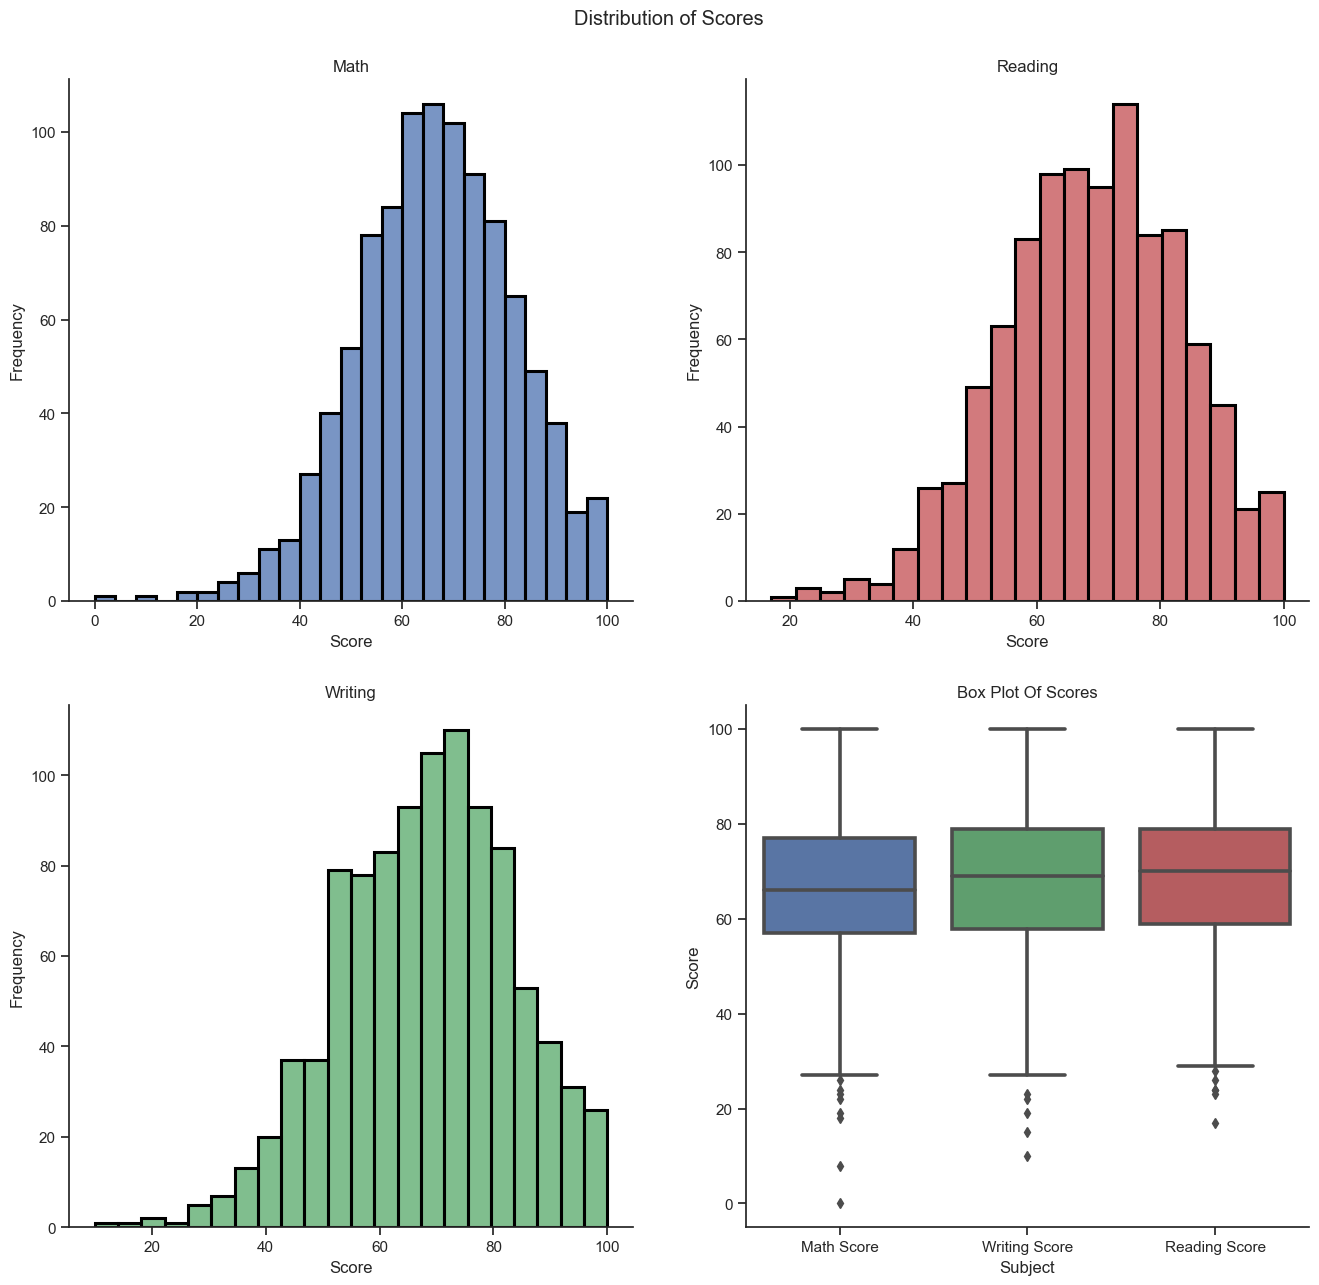

In [13]:
fig, ax = plt.subplots(2, 2, figsize=(16, 14))
ax = ax.flatten()  # Flatten the 2D array of axes for easier iteration

for i, subject in enumerate(subjects):
    sns.histplot(student_data,x=subject,ax=ax[i],edgecolor='black',linewidth=2.2,color=palette_scores[subject]) # Create and format plots
    ax[i].set_title(f"{subject.split(' ')[0]}")
    ax[i].set_ylabel(f"Frequency")
    ax[i].set_xlabel(f"Score")
    
sns.boxplot(scores,y='Score',x='Subject',ax=ax[3],linewidth=2.6,palette =palette_scores)
ax[3].set_title('Box Plot Of Scores')

fig.suptitle("Distribution of Scores")
plt.subplots_adjust(top=0.93)
plt.show()

For all subjects, the mean score appears to be around 68% and they have similar shaped distributions as well as similar/ almost identical upper and 
lower bounds, although Math Score's seem to have more outlier than the reading and writing.

## Distribution of Categorical Data

Text(0.5, 0.98, 'Distribution of Categorical Variables')

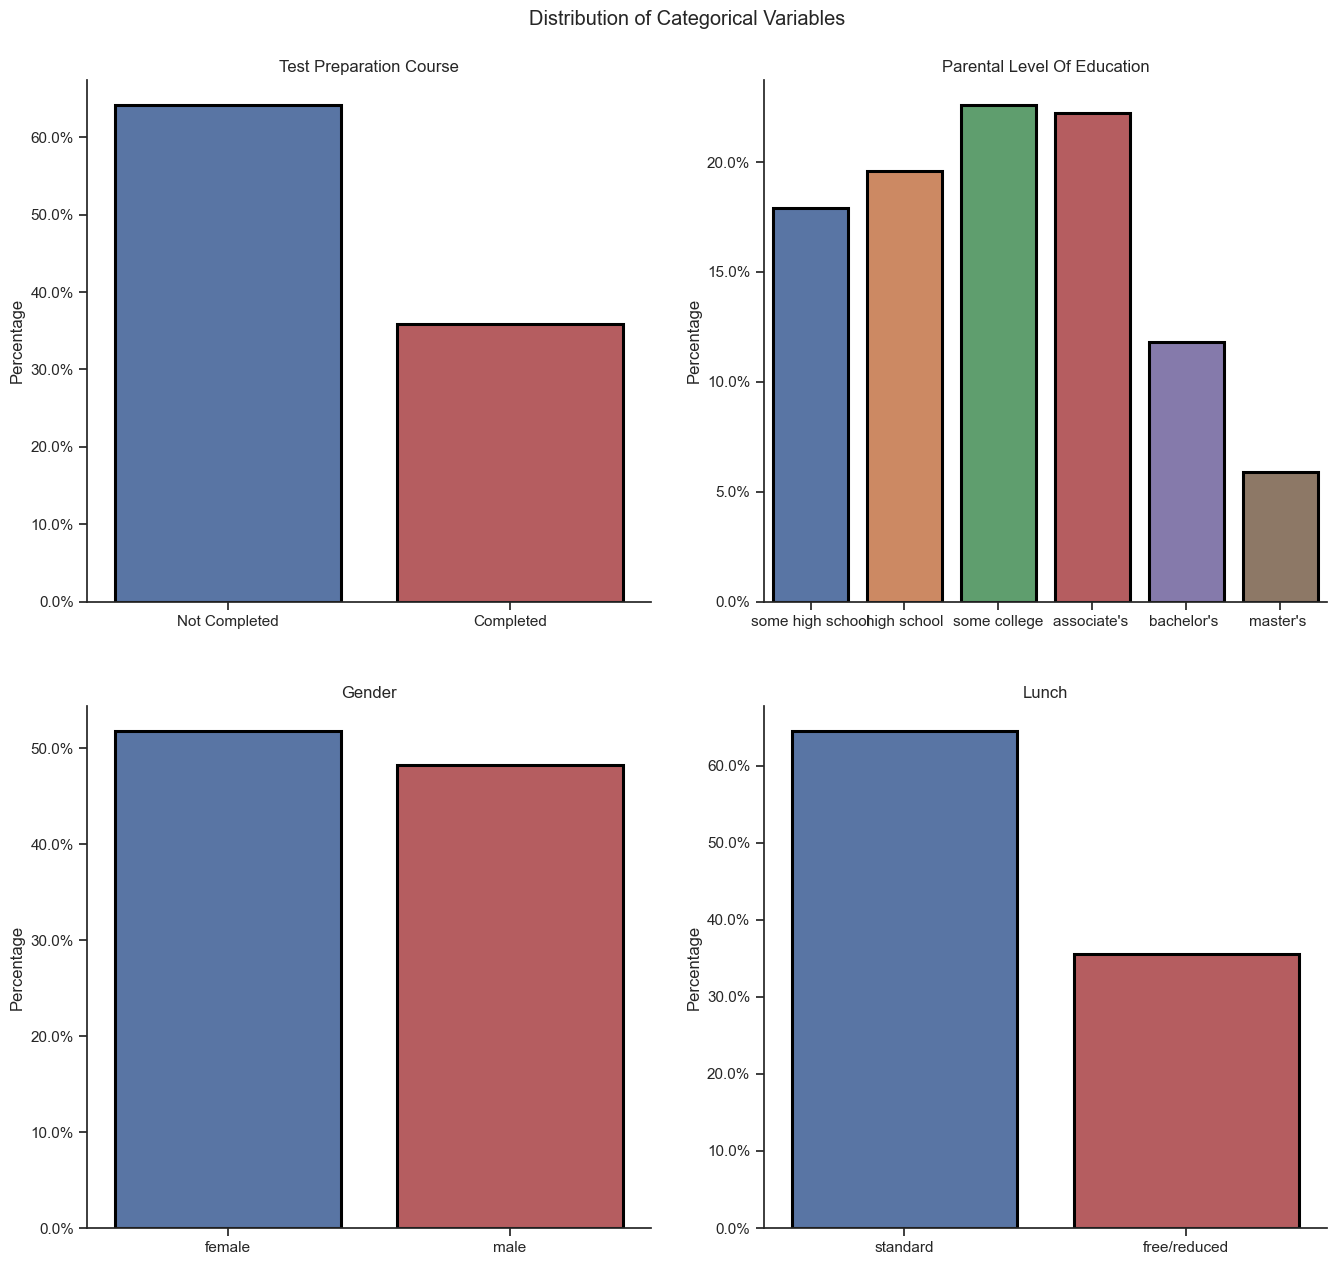

In [14]:
IV = ['Test Preparation Course','Parental Level Of Education','Gender', 'Lunch']
fig, ax = plt.subplots(2, 2, figsize=(16, 14))
ax = ax.flatten()  # Flatten the 2D array of axes for easier iteration
for i, var in enumerate(IV):
    if i != 1:
        palette = {student_data[var].unique()[0]: "#4C72B0", student_data[var].unique()[1]: "#C44E52"}
        order = None
    else:
        palette = 'deep'
        order = education_levels_no_degree
    student_datax = (student_data[var].value_counts(normalize=True)*100).reset_index()
    sns.barplot(student_datax,x=var,ax=ax[i],palette=palette,y='proportion',order = order,edgecolor='black',linewidth=2.2)
    ax[i].set_title(var)
    ax[i].set_ylabel(f"Percentage")
    ax[i].set_xlabel(f"")
    ax[i].yaxis.set_major_formatter(FuncFormatter(percent_formatter)) 
plt.subplots_adjust(top=0.93)
fig.suptitle('Distribution of Categorical Variables')


The data reveals that a majority of students did not finish the test preparation course. Additionally, there are slightly more female students than male students. Most students opted for the standard lunch, and it appears that the majority of parents have an educational background of some high school, bachelor's, or associate degrees.

# The effect of the Test Preparation Course

We will visualize the effect of the Course on student performance across all subjects

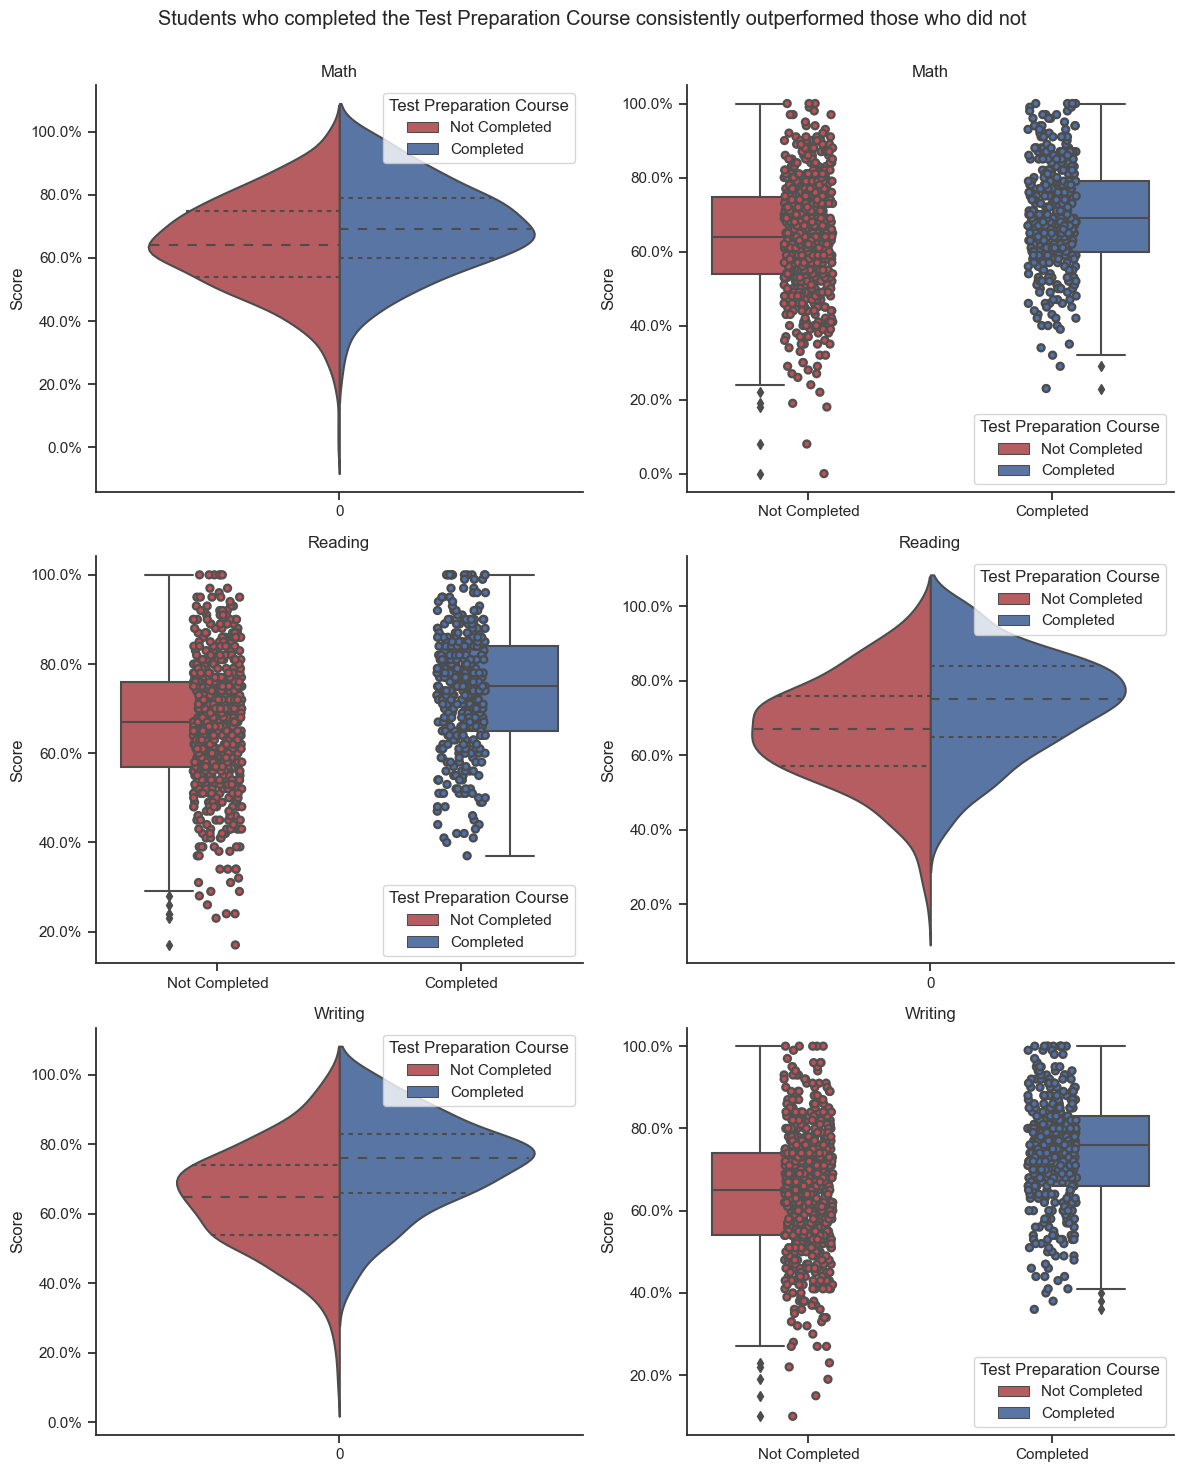

In [15]:
fig, ax = plt.subplots(3, 2, figsize=(12, 15))

ax = ax.flatten()
plot_points = [0,3,4]
for i, sub in enumerate(subjects2):
    if i in plot_points:
        sns.violinplot(data=student_data, x='0', y=sub, ax=ax[i],hue='Test Preparation Course',
                       split=True,inner='quart',palette = palette_test_prep,)
        
    else:
        sns.boxplot(data=student_data,x='Test Preparation Course', y=sub, ax=ax[i],
                    hue='Test Preparation Course',palette = palette_test_prep)
        sns.stripplot(data=student_data,x='Test Preparation Course', y=sub, ax=ax[i],linewidth=1.7,
                    hue='Test Preparation Course',legend=False,palette = palette_test_prep) 
    ax[i].set_title(f"{sub.split(' ')[0]}")
    ax[i].set_ylabel(f"Score")
    ax[i].set_xlabel(f"")
    ax[i].yaxis.set_major_formatter(FuncFormatter(percent_formatter)) # To add percentage signs to y axis

fig.suptitle("Students who completed the Test Preparation Course consistently outperformed those who did not")
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

These findings suggest that students who completed the test-taking course are less likely to receive failing grades compared to those who did not undertake the program. Furthermore, the visualizations suggest a more pronounced impact of the course on reading and writing subjects compared to mathematics.

# Investigating the Impact of Gender on Student Performance

In this analysis, we investigate the influence of gender on student academic achievements. Through visualization, we aim to unveil any patterns or distinctions in performance based on gender.

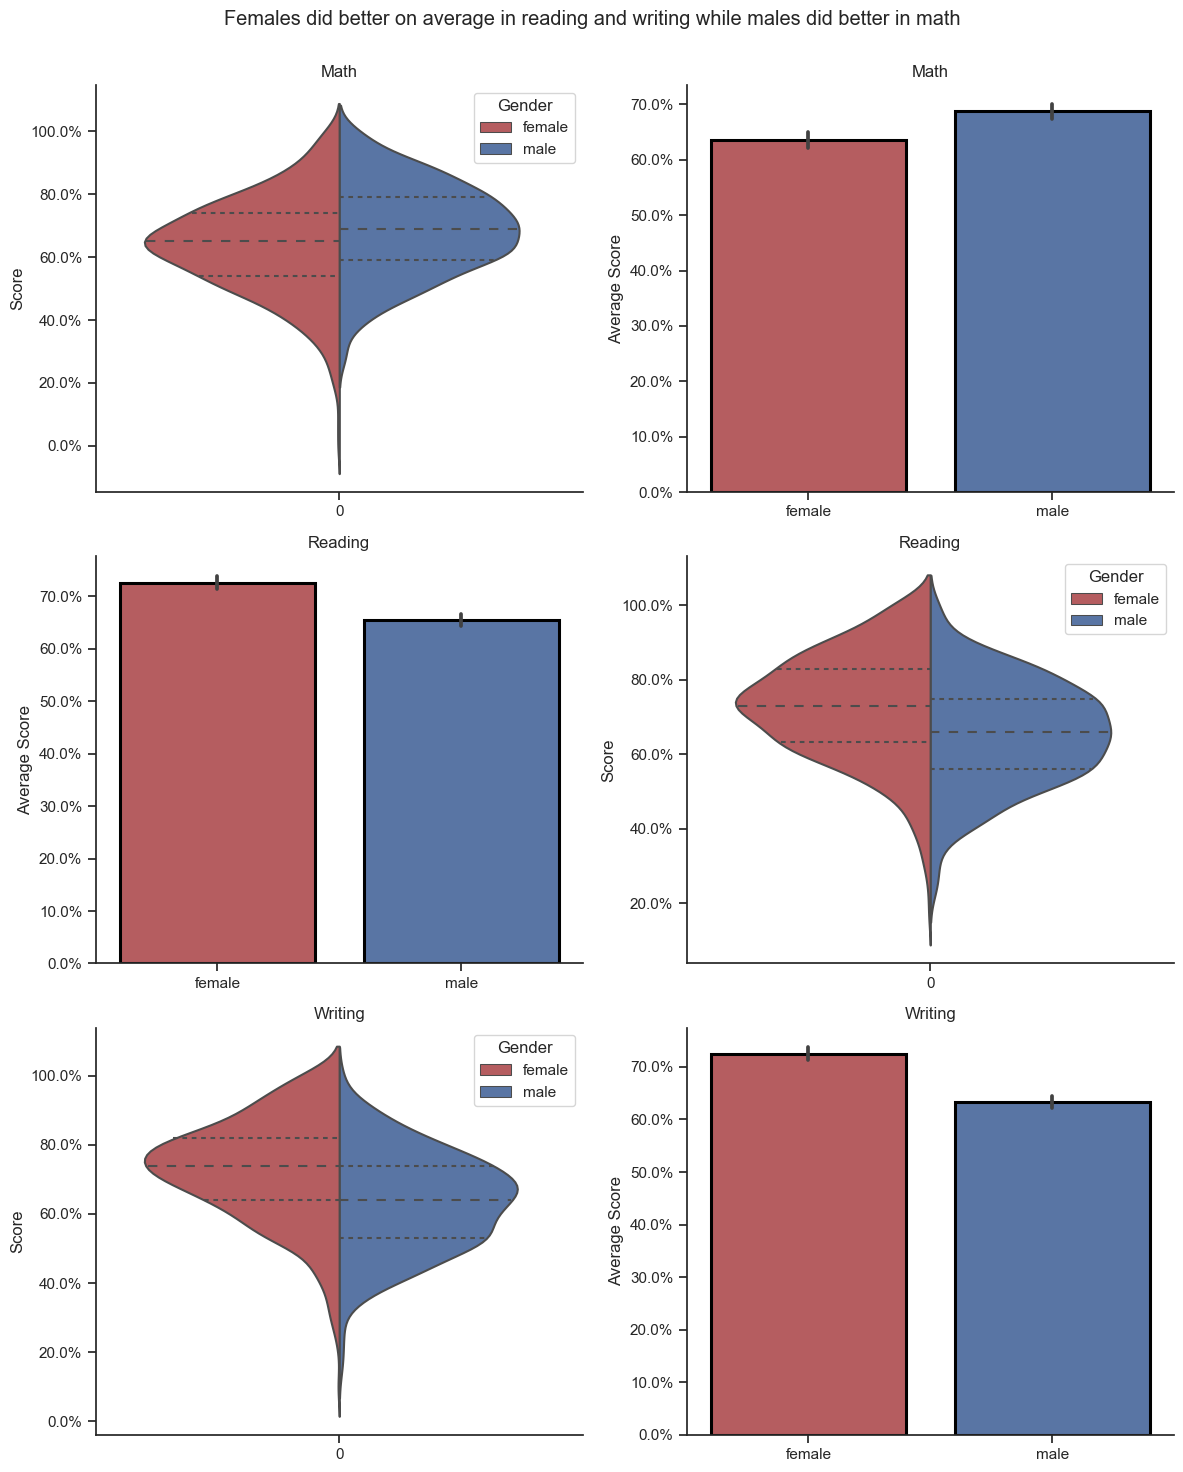

In [16]:
fig, ax = plt.subplots(3, 2, figsize=(12, 15))

ax = ax.flatten()
plot_points = [0,3,4]
for i, sub in enumerate(subjects2):
    if i in plot_points:
        sns.violinplot(data=student_data, x='0', y=sub, ax=ax[i],hue='Gender',
                       split=True,inner='quart',palette = palette_gender,)
        ax[i].set_ylabel(f"Score")
    else:
        sns.barplot(data=student_data, x='Gender', y=sub, ax=ax[i],palette = palette_gender,edgecolor='black',linewidth=2.2)
        ax[i].set_ylabel(f"Average Score")
    ax[i].set_title(f"{sub.split(' ')[0]}")
    ax[i].set_xlabel("")
    ax[i].yaxis.set_major_formatter(FuncFormatter(percent_formatter)) # To add percentage signs to y axis
    
fig.suptitle("Females did better on average in reading and writing while males did better in math")
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

On average, females generally outperform males in writing and reading, while males exhibit a slight advantage in math, although the difference is not substantial.

# The Effect of Lunch type on student Performance

In this analysis, we'll take a closer look at how the lunch choices of students may be linked to their academic performance. Through visualizations, our goal is to uncover any potential connections between lunch preferences and student scores.

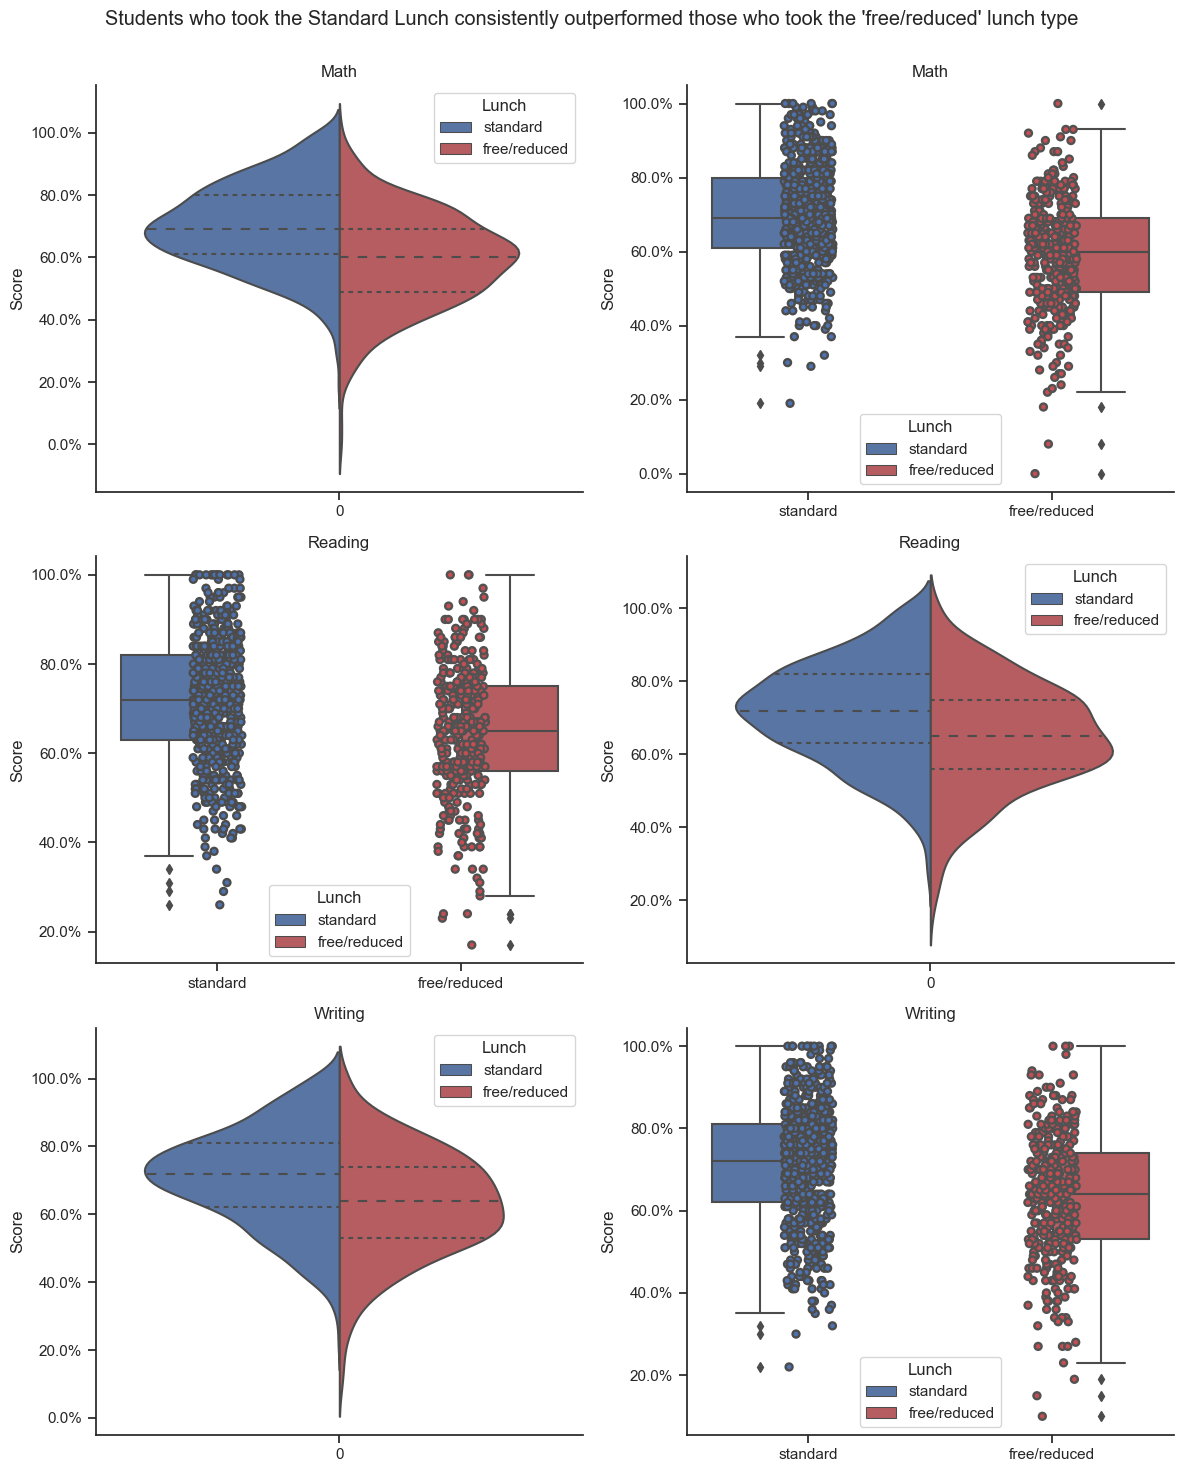

In [17]:
fig, ax = plt.subplots(3, 2, figsize=(12, 15))

ax = ax.flatten()
plot_points = [0,3,4]
for i, sub in enumerate(subjects2):
    if i in plot_points:
        sns.violinplot(data=student_data, x='0', y=sub, ax=ax[i],hue='Lunch',
                       split=True,inner='quart',palette = palette_lunch_type,)
    else:
        sns.boxplot(data=student_data,x='Lunch', y=sub, ax=ax[i],
                    hue='Lunch',palette = palette_lunch_type)
        sns.stripplot(data=student_data,x='Lunch', y=sub, ax=ax[i],linewidth=1.7,
                    hue='Lunch',legend=False,palette = palette_lunch_type) 
    ax[i].set_title(f"{sub.split(' ')[0]}")
    ax[i].set_ylabel(f"Score")
    ax[i].set_xlabel("")
    ax[i].yaxis.set_major_formatter(FuncFormatter(percent_formatter)) # To add percentage signs to y axis
    
fig.suptitle("Students who took the Standard Lunch consistently outperformed those who took the 'free/reduced' lunch type")
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

The type of lunch the student takes appears to exert a more noticeable influence than the test preparation course on student performance. Students who took the standard lunch had a higher average and lower range of values than those who took the free/reduced lunch type.

# Analyzing the Impact of Parental Education on Student Performance
This analysis focuses on understanding how parental education levels may relate to students' academic performance. Through visualizations, we aim to uncover any potential connections between parental education and student achievements.

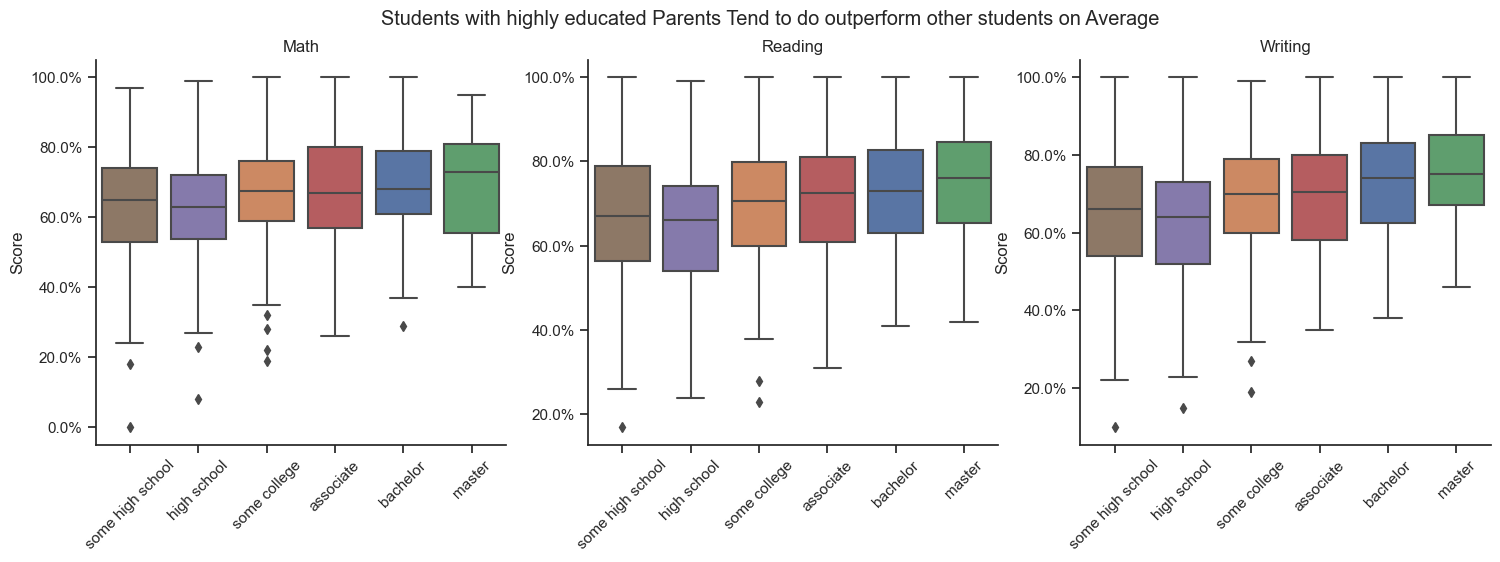

In [18]:
student_datas = student_data.copy()
education_levels_no_degree_2 = ['some high school', 'high school', 'some college', 'associate', 'bachelor', 'master']
student_datas['Parental Level Of Education'] = student_data['Parental Level Of Education'].str.replace("'s", '').str.strip()

fig, axes = plt.subplots(1, len(subjects), figsize=(18, 5))

for i, subject in enumerate(subjects):
    sns.boxplot(data=student_datas, x='Parental Level Of Education', y=subject, hue='Parental Level Of Education',width=0.8,dodge=False,
                order=education_levels_no_degree_2, ax=axes[i]).set(title=f"{subject.split(' ')[0]}", ylabel='Score', xlabel='')

    axes[i].legend().set_visible(False)
    axes[i].yaxis.set_major_formatter(FuncFormatter(percent_formatter))  # To add percentage signs to y axis
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
fig.suptitle('Students with highly educated Parents Tend to do outperform other students on Average')
plt.show()

Students whose parents possess a higher level of education, such as a master's degree, generally exhibit higher mean scores and a narrower range of values compared to students whose parents have a lower level of education, for example, completing only some high school.

# What is the correlation between the three subjects?
We'll use pearson correlation to test for the relationship between the scores

In [19]:
def correlation(df,col_a,col_b,method='pearson'):
    corr = pg.corr(student_data[col_a], student_data[col_b], method=method).round(4)
    r = corr['r'].values[0]
    return r,corr

In [20]:
pg.pairwise_corr(student_data).round(4)

X              Y   method alternative     n       r  \
0     Math Score  Reading Score  pearson   two-sided  1000  0.8176   
1     Math Score  Writing Score  pearson   two-sided  1000  0.8026   
2  Reading Score  Writing Score  pearson   two-sided  1000  0.9546   

          CI95%  p-unc        BF10  power  
0   [0.8, 0.84]    0.0  2.275e+237    1.0  
1  [0.78, 0.82]    0.0  1.317e+222    1.0  
2  [0.95, 0.96]    0.0         nan    1.0

All three subjects are highly correlated. Meaning students who do well in one subject tend to do well in all others.However, the correlation between reading and writing is impressive(r = 0.9546).This is probably because reading and writing are more closely connected than reading and math or writing and math. Further more, the p values are less than 0.05 so the results are statistically significant. To better understand this, we will create visualizations.

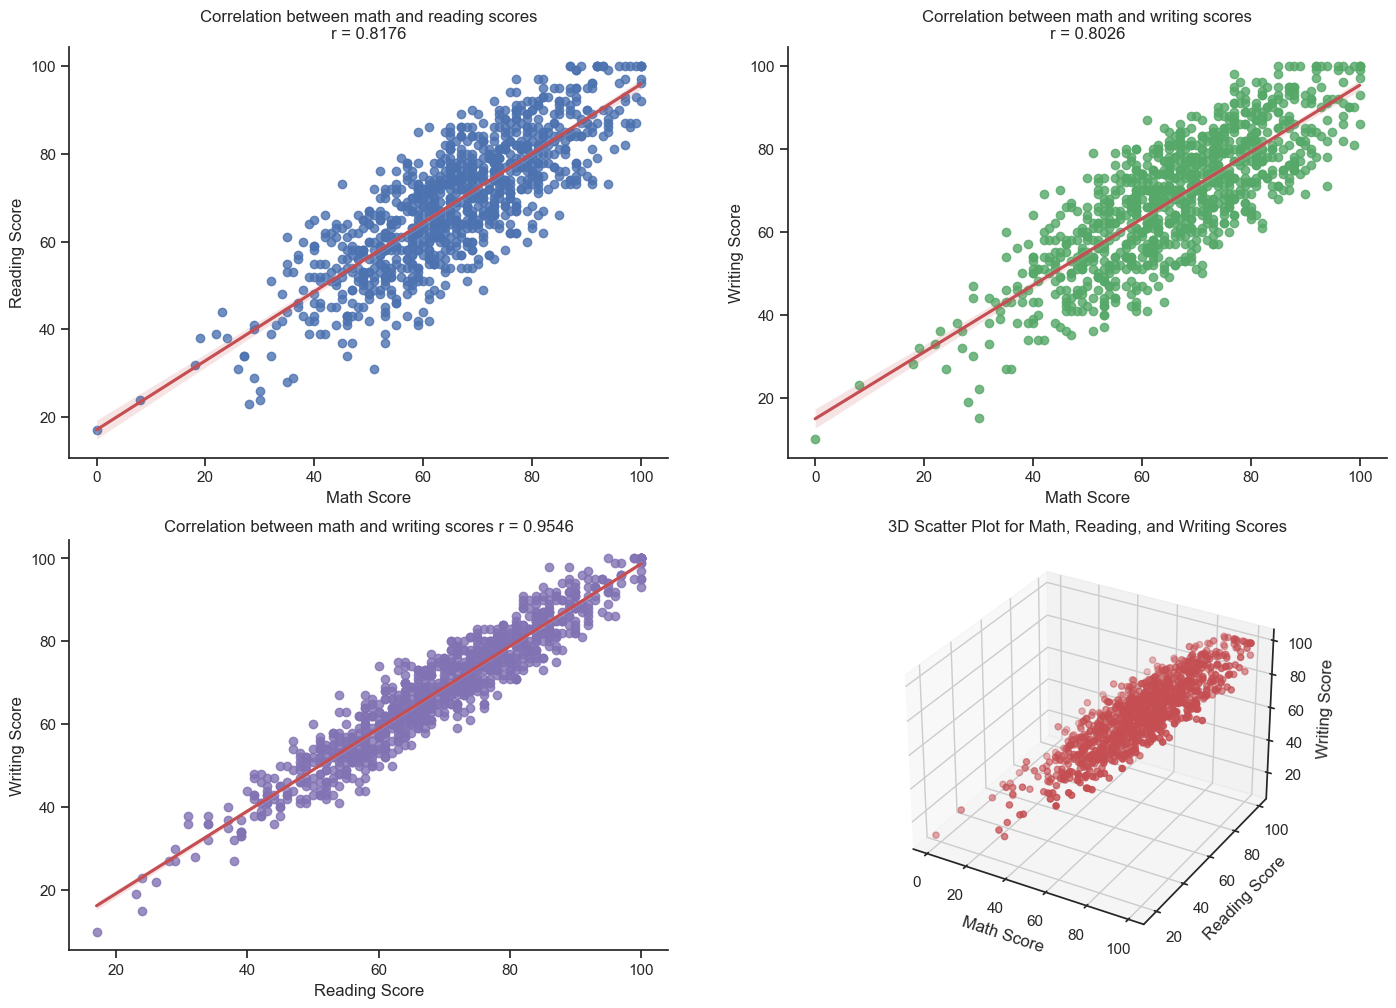

In [21]:
fig = plt.figure(figsize=(17, 7))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4, projection='3d')

math_reading_r = correlation(student_data,'Math Score','Reading Score')
math_writing_r = correlation(student_data,'Math Score','Writing Score')
writing_reading_r = correlation(student_data,'Writing Score','Reading Score')

sns.regplot(data=student_data, x='Math Score', y='Reading Score', scatter_kws={'color': '#4C72B0'}, line_kws={'color': '#C44E52'},ax=ax1)
ax1.set_title(f'Correlation between math and reading scores\nr = {math_reading_r[0]}')

sns.regplot(data=student_data, x='Math Score', y='Writing Score', scatter_kws={'color': '#55A868'}, line_kws={'color': '#C44E52'},ax=ax2)
ax2.set_title(f'Correlation between math and writing scores\nr = {math_writing_r[0]}')

sns.regplot(data=student_data, x='Reading Score', y='Writing Score',scatter_kws={'color': '#8172B3'}, line_kws={'color': '#C44E52'},ax=ax3)
ax3.set_title(f'Correlation between math and writing scores r = {writing_reading_r[0]}')

ax4.scatter(xs = student_data['Math Score'], ys = student_data['Reading Score'], zs=student_data['Writing Score'], color='#C44E52')#'#4C72B0')

ax4.set_xlabel('Math Score')
ax4.set_ylabel('Reading Score')
ax4.set_zlabel('Writing Score')
ax4.set_title('3D Scatter Plot for Math, Reading, and Writing Scores')
plt.subplots_adjust(top=1.4)

As we can see from the plots, students who do well in one subject tend to do well in others and vice versa. This linear relationship is stronger in writing and reading scores than others

# Conclusion

The data suggests a normal distribution for all subjects. A significant number of students did not complete the test preparation course, with a slightly higher representation of female students. The majority preferred the standard lunch option, and parents generally have educational backgrounds ranging from some high school to bachelor's and associate degrees. There's a notable high correlation between scores in different subjects. The factors exerting the greatest impact on student performance are identified as lunch type and participation in the test preparation course.